<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_WState_00_statevector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=58912172bdc4820dd0681daa681fbbba35fbbc117c37c154b436f9b176d5e5d0
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.8 MB/s eta 0:00:00
  Cloning https://github.com/qis

In [4]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [17]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit_textbook.tools import array_to_latex
from IPython.display import display, Math
import numpy as np
from numpy import pi

In [10]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qreg_q, creg_c)

qc.x(qreg_q[0])
qc.ry(pi / 2.552, qreg_q[0])
qc.ch(qreg_q[0], qreg_q[1])
qc.cx(qreg_q[1], qreg_q[2])
qc.cx(qreg_q[0], qreg_q[1])
qc.x(qreg_q[0])

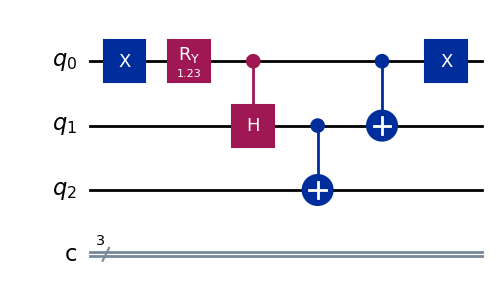

In [11]:
# 3큐비트 W-State 생성
qc.draw(output='mpl')

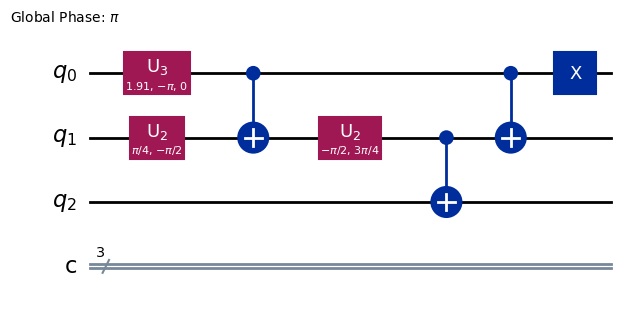

In [13]:
# 시뮬레이션 실행
backend = Aer.get_backend('statevector_simulator')
#backend = Aer.get_backend('qasm_simulator')

qc_transpiled = transpile(qc, backend)

qc_transpiled.draw('mpl')

In [21]:
# 시뮬레이션 실행

result = backend.run(qc_transpiled, shot=1024).result()
statevector = result.get_statevector()
print(statevector)

Statevector([ 0.00000000e+00+0.00000000e+00j,
             -5.77379739e-01+1.46376615e-16j,
              5.77335534e-01-1.11022302e-16j,
              0.00000000e+00+0.00000000e+00j,
              5.77335534e-01+5.55111512e-17j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -9.33451462e-17+0.00000000e+00j],
            dims=(2, 2, 2))


In [22]:
print(statevector.probabilities_dict())

{'001': 0.3333673629186278, '010': 0.33331631854068616, '100': 0.33331631854068616, '111': 8.713316325335827e-33}


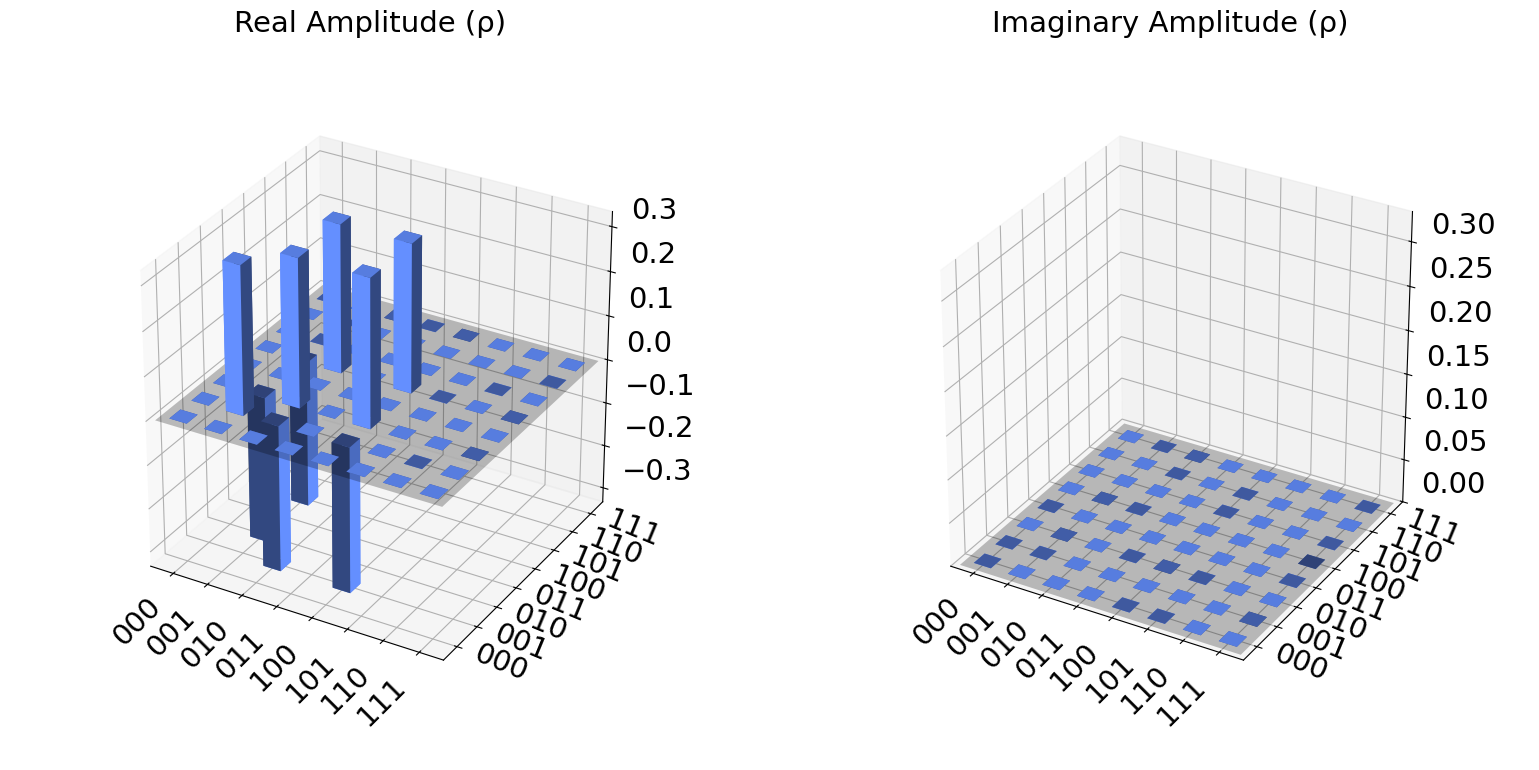

In [23]:
plot_state_city(statevector)

In [24]:
counts = result.get_counts()
print(counts)

{'000': 1}


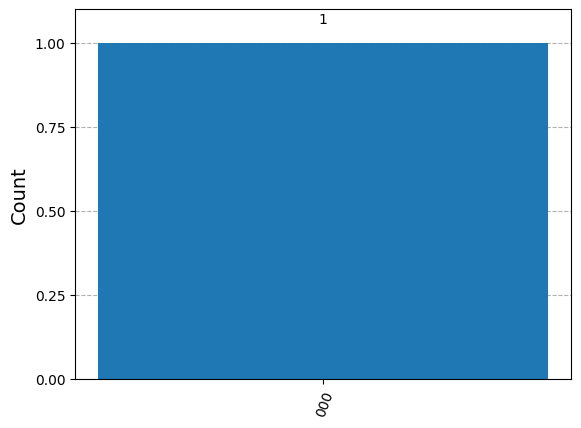

In [25]:
plot_histogram(counts)

In [26]:
# W-State 검증
def verify_w_state(statevector, n_qubits):
    """
    생성된 상태가 W-State인지 검증
    """
    # 이론적 W-State 확률 계산
    theoretical_prob = 1 / n_qubits

    # 각 기저 상태의 확률 계산
    probabilities = {}
    for i in range(2**n_qubits):
        bitstring = format(i, f'0{n_qubits}b')
        prob = abs(statevector[i])**2
        if prob > 1e-10:  # 무시할 수 있는 작은 값 필터링
            probabilities[bitstring] = prob
        ###if
    ###for

    # W-State 기저 상태만 남기기
    w_state_bases = [format(2**i, f'0{n_qubits}b') for i in range(n_qubits)]

    # 검증
    is_w_state = True
    for basis, prob in probabilities.items():
        if basis in w_state_bases:
            if abs(prob - theoretical_prob) > 1e-10:
                is_w_state = False
                break
        else:
            if prob > 1e-10:
                is_w_state = False
                break
            ###if
        ###if
    ###for

    return is_w_state, probabilities
###def

In [27]:
# W-State 검증 실행
is_valid, probs = verify_w_state(statevector, 3)
print("\nW-State 검증 결과:", "유효함" if is_valid else "유효하지 않음")
print("확률 분포:", probs)


W-State 검증 결과: 유효하지 않음
확률 분포: {'001': 0.3333673629186278, '010': 0.33331631854068616, '100': 0.33331631854068616}
